# 载入数据

In [1]:
import pickle
import numpy as np

In [2]:
with open('predict_train_test_data.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [3]:
trainX      = data['x_train_new']
trainY      = data['trainY']
testX       = data['x_test_new']
testY       = data['testY']
del data

In [4]:
trainX.shape

(2747L, 12L)

# 取其中的三类

In [5]:
#训练集，用于构造分类器
index=np.nonzero(trainY<=2)
train_3X = trainX[index]
train_3Y = trainY[index]
train_0X = trainX[np.nonzero(trainY==0)]
train_1X = trainX[np.nonzero(trainY==1)]
train_2X = trainX[np.nonzero(trainY==2)]
train3X=[train_0X,train_1X,train_2X]
#测试集，用于测试分类器
index=np.nonzero(testY<=2)
test_3X = testX[index]
test_3Y = testY[index]

In [7]:
from scipy import stats
kde = stats.gaussian_kde(train3X[0][:,0], bw_method='scott')

In [ ]:
kde.scotts_factor

## 计算概率分布p(y=i)

In [6]:
#样本总数
total=len(train_3Y)
#三类样本数
n0 = np.count_nonzero(train_3Y==0)
n1 = np.count_nonzero(train_3Y==1)
n2 = np.count_nonzero(train_3Y==2)
#p(y=i)
p_y_0 = n0*1.0/total
p_y_1 = n1*1.0/total
p_y_2 = n2*1.0/total
p_y=[p_y_0,p_y_1,p_y_2]

## 计算概率密度p(xi|y=j)
每个类有十个特征，共需计算30个条件概率密度

In [7]:
from six import string_types
from scipy import stats
def pdf(data):   
    bw="scott"
    kde = stats.gaussian_kde(data, bw_method=bw)
    if isinstance(bw, string_types):
        bw = "scotts" if bw == "scott" else bw
        bw = getattr(kde, "%s_factor" % bw)() * np.std(data)

    clip = (-np.inf, np.inf)
    gridsize = 100
    cut = 4
    support_min = max(data.min() - bw * cut, clip[0])
    support_max = min(data.max() + bw * cut, clip[1])
    grid = np.linspace(support_min, support_max, gridsize)
    y = kde(grid)
    x, y =grid, y
    y = np.amax(np.c_[np.zeros_like(y), y], axis=1)
    return [x,y]

In [8]:
#类别数
nc = 3
#特征数
nf = 12
pdfs=[[],[],[]]

for i in range(nc):
    for j in range(nf):
        pdfs[i].append(pdf(train3X[i][:,j]))

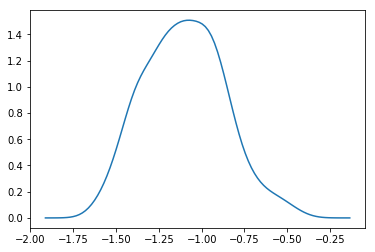

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(pdfs[0][0][0],pdfs[0][0][1])

In [10]:
#分类器
def classifier(test):
    
    pre = np.zeros([len(test),nc])
    for i in range(len(test)):
        
        up = []
        for j in range(nc): #对每个类，找到
                             #找到各个特征值对应的概率密度
            
            tmp = 1
            for n in range(nf):#循环求得概率密度
                x=pdfs[j][n][0]#类别j的第n个特征的pdf
                y=pdfs[j][n][1]
                
                index=np.nonzero(x>=test[i][n])[0]
                if len(index)==0:
                    index=-1
                else:
                    index = index[0]
                #print(i,n)
                tmp=tmp*y[index]#可能为0
            tmp = tmp*p_y[j]#将概率密度与p(y=i)相乘得到分子
            up.append(tmp)#分母为所有分子的和，保存所有分子
        down = 0#分母
        for m in up:#将所有分子相加得到分母
            down = down + m#为0的概率小
        for j in range(nc):
            pre[i,j]=up[j]*1.0/down#p(y=j|x=i),即当样本为i时类别为j的概率
    pre = pre.argmax(axis=1)
    return pre

In [11]:
pre_train=classifier(train_3X)
acc=np.count_nonzero(pre_train==train_3Y)
acc=acc*1.0/len(train_3Y)
print acc*100,'%'

pre_test=classifier(test_3X)
acc=np.count_nonzero(pre_test==test_3Y)
acc=acc*1.0/len(test_3Y)
print acc*100,'%'

100.0 %
85.1951547779 %


# 6类情况下

In [23]:
#训练集，用于构造分类器
index=np.nonzero(trainY<=5)
train_6X = trainX[index]
train_6Y = trainY[index]
train_0X = trainX[np.nonzero(trainY==0)]
train_1X = trainX[np.nonzero(trainY==1)]
train_2X = trainX[np.nonzero(trainY==2)]
train_3X = trainX[np.nonzero(trainY==3)]
train_4X = trainX[np.nonzero(trainY==4)]
train_5X = trainX[np.nonzero(trainY==5)]
train6X=[train_0X,train_1X,train_2X,train_3X,train_4X,train_5X]
#测试集，用于测试分类器
index=np.nonzero(testY<=5)
test_6X = testX[index]
test_6Y = testY[index]

In [13]:
#样本总数
total=len(train_6Y)
#三类样本数
n0 = np.count_nonzero(train_6Y==0)
n1 = np.count_nonzero(train_6Y==1)
n2 = np.count_nonzero(train_6Y==2)
n3 = np.count_nonzero(train_6Y==3)
n4 = np.count_nonzero(train_6Y==4)
n5 = np.count_nonzero(train_6Y==5)
#p(y=i)
p_y_0 = n0*1.0/total
p_y_1 = n1*1.0/total
p_y_2 = n2*1.0/total
p_y_3 = n3*1.0/total
p_y_4 = n4*1.0/total
p_y_5 = n5*1.0/total

p_y=[p_y_0,p_y_1,p_y_2,p_y_3,p_y_4,p_y_5]

In [14]:
#类别数
nc = 6
#特征数
nf = 12
pdfs=[]
for i in range(nc):
    pdfs.append([])

for i in range(nc):
    for j in range(nf):
        pdfs[i].append(pdf(train6X[i][:,j]))

In [22]:
pre_train=classifier(train_6X)
acc=np.count_nonzero(pre_train==train_6Y)
acc=acc*1.0/len(train_6Y)
print acc*100,'%'



100.0 %


In [25]:
pre_test=classifier(test_6X)
acc=np.count_nonzero(pre_test==test_6Y)
acc=acc*1.0/len(test_6Y)
print acc*100,'%'

89.7727272727 %


In [27]:
pre_test=classifier(test_3X)
acc=np.count_nonzero(pre_test==test_3Y)
acc=acc*1.0/len(test_3Y)
print acc*100,'%'

82.6379542396 %


In [29]:
pre_test

array([5, 0, 1, 1, 2, 2, 2, 2, 0, 4, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2,
       2, 3, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 3, 1, 2,
       1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 2, 2, 0, 2, 1, 2, 4, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1,
       2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 4, 0, 1, 2, 2,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0,
       0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 3, 1, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 2, 3, 2, 3, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 4, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1,
       2, 0, 0, 1, 3, 2, 2, 2, 0, 4, 1, 1, 2, 2, 0, 1, 2, 1, 4, 2, 0, 2,
       0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1,

# 在3类测试集上的效果变差，原因在于引入新的类别后，某些样本会归为新类